<a href="https://colab.research.google.com/github/BethwellOS/Vegetation-Indices/blob/main/Indices_Comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyforest
!pip install rasterio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import rasterio
import geopandas as gpd
from pyforest import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Specify the directory path
directory_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms'

# List all the GeoTIFF files in the directory
tif_files = glob.glob(f'{directory_path}/*.tif')

# Print the list of files
print("List of GeoTIFF files:", tif_files)


<IPython.core.display.Javascript object>

List of GeoTIFF files: ['/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/jan21_31_9%.tif', '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/Feb 21_0%.tif', '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/Mar21_1%.tif', '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/Jun21_3%.tif', '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/Jul21_4%.tif', '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/Aug21_0%.tif', '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/Sept21_0%.tif', '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/Oct21_1%.tif', '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/Nov21_1%.tif', '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/Dec21_1%.tif', '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/Jan2022_2%.tif', '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/Feb2022_0%.tif', '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/Mar2022_0%.tif', '/c

In [5]:
# Define the path to your GeoTIFF image file
image_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/coffee_farms/Jun21_3%.tif'

Normalized	Difference
Vegetation Index (NDVI)


In [6]:
# Open the GeoTIFF image file using rasterio
with rasterio.open(image_path) as src:
    # Read the necessary bands for NDVI calculation (NIR and Red)
    nir_band = src.read(8).astype(float)  # Convert to float
    red_band = src.read(6).astype(float)  # Convert to float

    # Ensure that the bands have the same shape
    assert nir_band.shape == red_band.shape, "NIR and Red bands must have the same shape"

    # Handle NoData values (if any)
    nodata_value = src.meta['nodata']
    nir_band[nir_band == nodata_value] = np.nan
    red_band[red_band == nodata_value] = np.nan

    # Initialize ndvi before using it in np.divide
    ndvi = np.zeros_like(nir_band)

    # Calculate NDVI, handling division by zero
    ndvi_denominator = nir_band + red_band
    ndvi_denominator[ndvi_denominator == 0] = np.nan  # Avoid division by zero
    np.divide((nir_band - red_band), ndvi_denominator, out=ndvi, where=ndvi_denominator != 0)

    # Get metadata from the source GeoTIFF
    meta = src.meta.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Convert the NDVI NumPy array to a Pandas DataFrame
df_ndvi = pd.DataFrame(ndvi, columns=[f'Column_{i}' for i in range(ndvi.shape[1])])

# Save the DataFrame to a CSV file
df_ndvi.to_csv('ndvi_values_06_2021.csv', index=False)

<IPython.core.display.Javascript object>

In [8]:
# Update metadata for the new GeoTIFF with NDVI values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the NDVI GeoTIFF file
ndvi_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/ndvi_06_21.tif'

# Create a new GeoTIFF file and write NDVI values
with rasterio.open(ndvi_output_path, 'w', **meta) as dst:
    dst.write(ndvi.astype(rasterio.float32), 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Row Index')

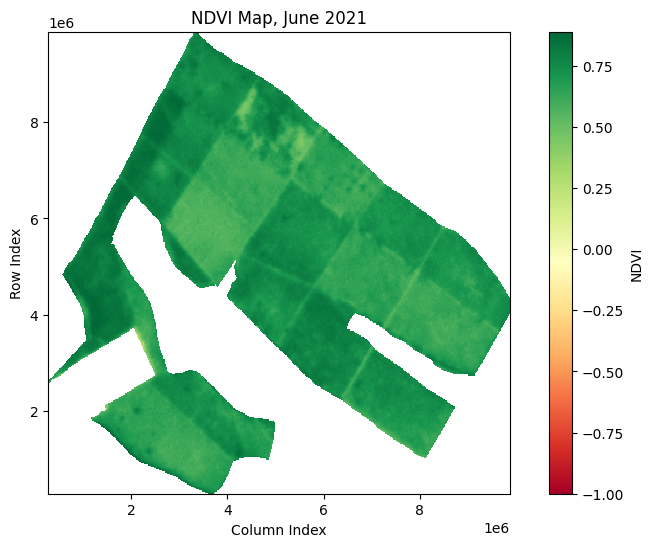

In [9]:
# Create a graph of NDVI values
plt.figure(figsize=(10, 6))
# plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1, aspect='auto')
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=np.nanmax(ndvi), extent=src.bounds, interpolation='none')
plt.colorbar(label='NDVI')
plt.title('NDVI Map, June 2021')
plt.xlabel('Column Index')
plt.ylabel('Row Index')


In [10]:
# Save the graph as an image
ndvi_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/ndvi_graph06_21.png'
plt.savefig(ndvi_graph_path, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

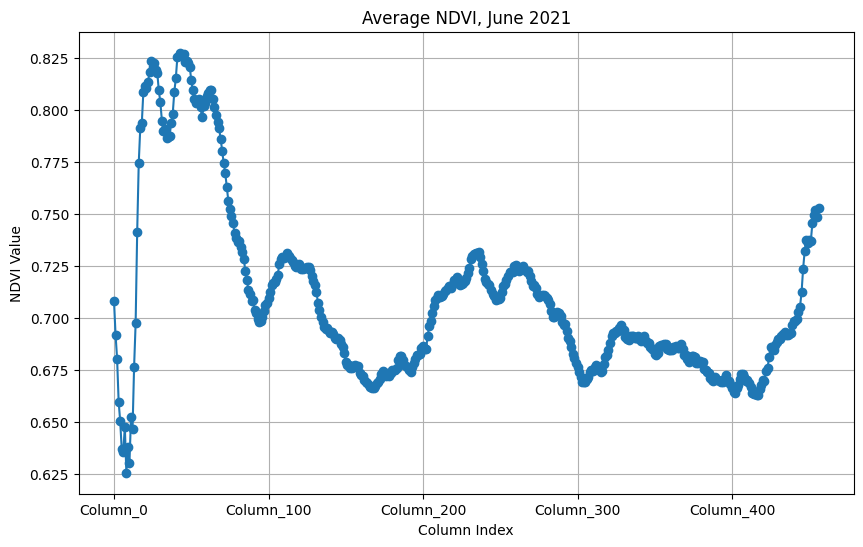

In [11]:
# Create a line chart of NDVI values
df_ndvi.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average NDVI, June 2021')
plt.xlabel('Column Index')
plt.ylabel('NDVI Value')
plt.grid(True)


In [12]:
# Save the chart as an image file
ndvi_chart_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/ndvi_graph06_21_1.png'
plt.savefig(ndvi_chart_path)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

Renormalized	Normalized
Difference Vegetation Index (RNDVI)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

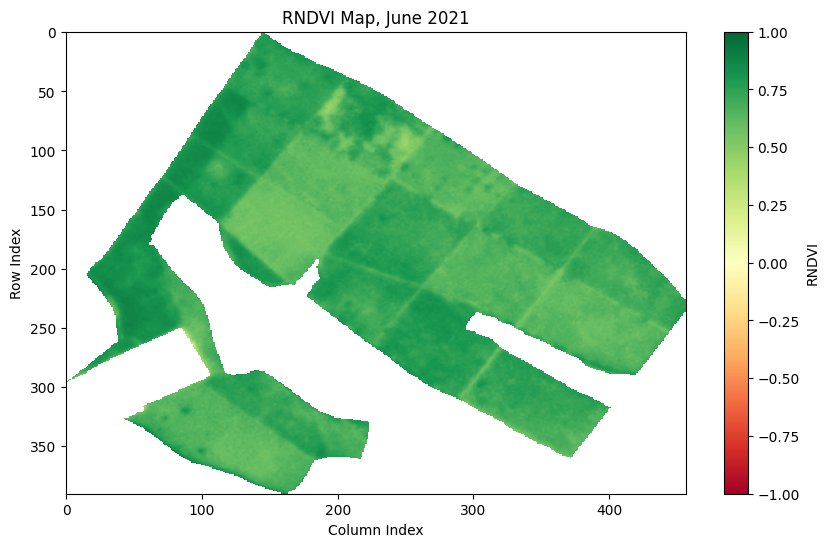

<IPython.core.display.Javascript object>

In [13]:

    # Define the constant 'L' for RNDVI
    L = 0.1

    # Calculate RNDVI using the recommended formula
    rndvi_denominator = nir_band + red_band + L
    rndvi = np.divide((nir_band - red_band), rndvi_denominator, out=np.zeros_like(nir_band), where=rndvi_denominator != 0)

# Create a graph of RNDVI values

plt.figure(figsize=(10, 6))
plt.imshow(rndvi, cmap='RdYlGn', vmin=-1, vmax=1, aspect='auto')
plt.colorbar(label='RNDVI')
plt.title('RNDVI Map, June 2021')
plt.xlabel('Column Index')
plt.ylabel('Row Index')

# Save the graph as an image file
rndvi_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/rndvi_graph06_21.png'
plt.savefig(rndvi_graph_path)
plt.show()

# Save the RNDVI values to a CSV file
df_rndvi = pd.DataFrame(rndvi, columns=[f'Column_{i}' for i in range(rndvi.shape[1])])
df_rndvi.to_csv('/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/rndvi_values06_21.csv', index=False)

In [14]:
# Update metadata for the new GeoTIFF with RNDVI values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the RNDVI GeoTIFF file
rndvi_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/rndvi_06_21.tif'

# Create a new GeoTIFF file and write RNDVI values
with rasterio.open(rndvi_output_path, 'w', **meta) as dst:
    dst.write(rndvi.astype(rasterio.float32), 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

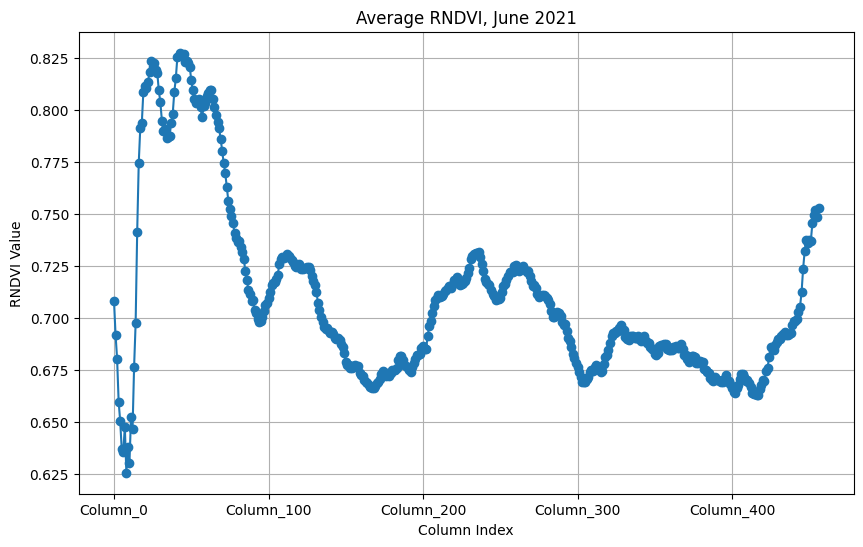

In [15]:
# Create a line chart of RNDVI values
df_rndvi.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average RNDVI, June 2021')
plt.xlabel('Column Index')
plt.ylabel('RNDVI Value')
plt.grid(True)


Enhanced Vegetation Index
(EVI)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

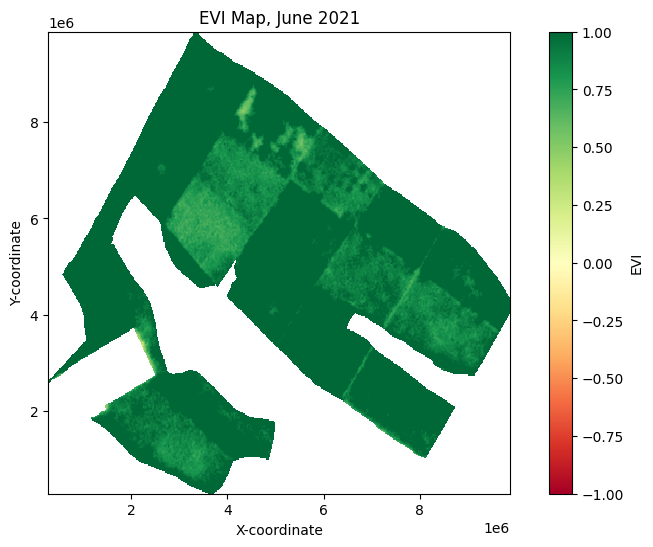

<IPython.core.display.Javascript object>

In [16]:
# Open the GeoTIFF image file using rasterio
with rasterio.open(image_path) as src:
    # Read the necessary bands for EVI calculation (NIR, Red, and Blue)
    nir_band = src.read(8).astype(float)  # Convert to float
    red_band = src.read(6).astype(float)  # Convert to float
    blue_band = src.read(2).astype(float)  # Convert to float

    # Ensure that the bands have the same shape
    assert nir_band.shape == red_band.shape == blue_band.shape, "NIR, Red, and Blue bands must have the same shape"

    # Handle NoData values (if any)
    nodata_value = src.meta['nodata']
    nir_band[nir_band == nodata_value] = np.nan
    red_band[red_band == nodata_value] = np.nan
    blue_band[blue_band == nodata_value] = np.nan

    # Calculate EVI using the formula
    evi_numerator = 2.5 * (nir_band - red_band)
    evi_denominator = nir_band + 6 * red_band - 7.5 * blue_band + 1
    evi = np.divide(evi_numerator, evi_denominator, out=np.zeros_like(nir_band), where=evi_denominator != 0)

# Create a graph of EVI values
plt.figure(figsize=(10, 6))
plt.imshow(evi, cmap='RdYlGn', vmin=-1, vmax=1, extent=src.bounds, interpolation='none')
plt.colorbar(label='EVI')
plt.title('EVI Map, June 2021')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Save the graph as an image file
evi_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/evi_graph06_21.png'
plt.savefig(evi_graph_path)
plt.show()

# Save the EVI values to a CSV file
df_evi = pd.DataFrame(evi, columns=[f'Column_{i}' for i in range(evi.shape[1])])
df_evi.to_csv('/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/evi_values06_2021.csv', index=False)


In [17]:
# Update metadata for the new GeoTIFF with EVI values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the EVI GeoTIFF file
evi_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/evi_06_21.tif'

# Create a new GeoTIFF file and write EVI values
with rasterio.open(evi_output_path, 'w', **meta) as dst:
    dst.write(evi.astype(rasterio.float32), 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

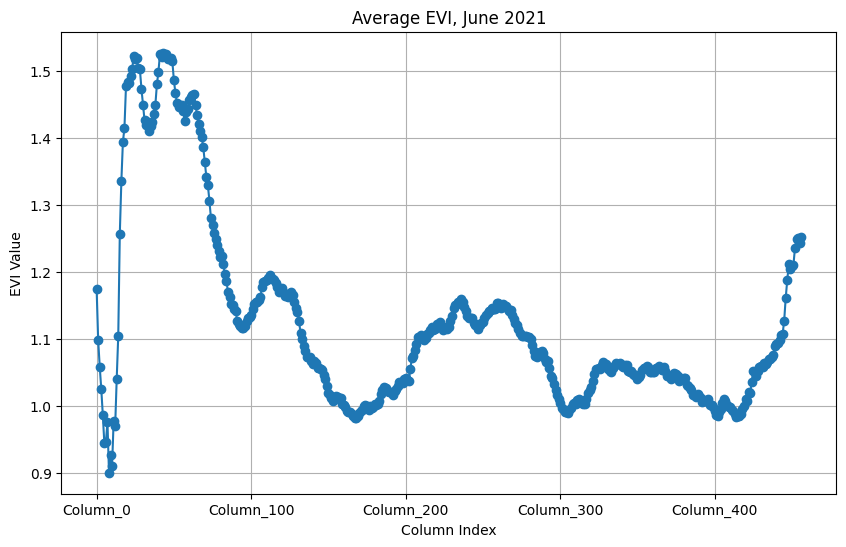

In [18]:
# Create a line chart of EVI values
df_evi.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average EVI, June 2021')
plt.xlabel('Column Index')
plt.ylabel('EVI Value')
plt.grid(True)


Green normalized difference
vegetation index (GNDVI)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

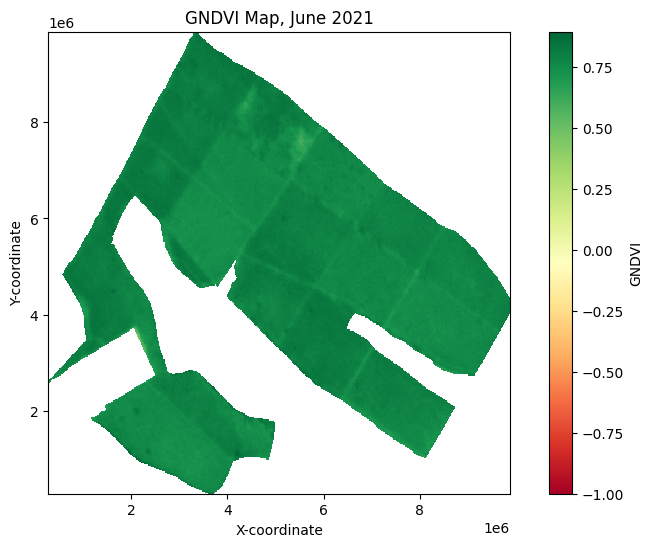

<IPython.core.display.Javascript object>

In [19]:
# Open the GeoTIFF image file using rasterio
with rasterio.open(image_path) as src:
    # Read the necessary bands for GNDVI calculation (NIR and Green)
    nir_band = src.read(8).astype(float)  # Convert to float
    green_band = src.read(4).astype(float)  # Convert to float

    # Ensure that the bands have the same shape
    assert nir_band.shape == green_band.shape, "NIR and Green bands must have the same shape"

    # Handle NoData values (if any)
    nodata_value = src.meta['nodata']
    nir_band[nir_band == nodata_value] = np.nan
    green_band[green_band == nodata_value] = np.nan

    # Calculate GNDVI using the formula
    gndvi_denominator = nir_band + green_band
    gndvi = np.divide((nir_band - green_band), gndvi_denominator, out=np.zeros_like(nir_band), where=gndvi_denominator != 0)

# Create a graph of GNDVI values
plt.figure(figsize=(10, 6))
plt.imshow(gndvi, cmap='RdYlGn', vmin=-1, vmax=np.nanmax(gndvi), extent=src.bounds, interpolation='none')
plt.colorbar(label='GNDVI')
plt.title('GNDVI Map, June 2021')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Save the graph as an image file
gndvi_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/gndvi_graph06_21.png'
plt.savefig(gndvi_graph_path)
plt.show()

# Save the GNDVI values to a CSV file
df_gndvi = pd.DataFrame(gndvi, columns=[f'Column_{i}' for i in range(gndvi.shape[1])])
df_gndvi.to_csv('/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/gndvi_values06_2021.csv', index=False)

In [20]:
# Update metadata for the new GeoTIFF with GNDVI values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the GNDVI GeoTIFF file
gndvi_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/gndvi_06_21.tif'

# Create a new GeoTIFF file and write GNDVI values
with rasterio.open(gndvi_output_path, 'w', **meta) as dst:
    dst.write(gndvi.astype(rasterio.float32), 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

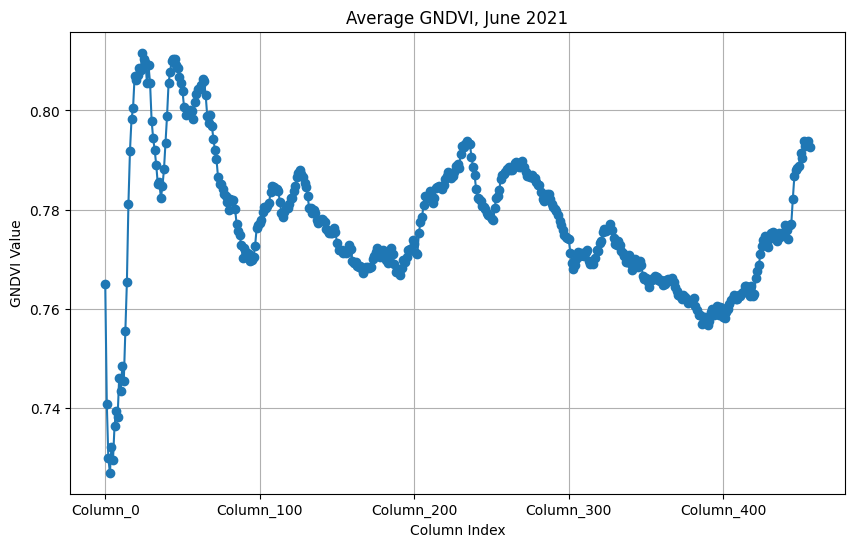

In [21]:
# Create a line chart of GNDVI values
df_gndvi.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average GNDVI, June 2021')
plt.xlabel('Column Index')
plt.ylabel('GNDVI Value')
plt.grid(True)

Simplified		Canopy Chlorophyll	Content		Index
(SCCCI)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

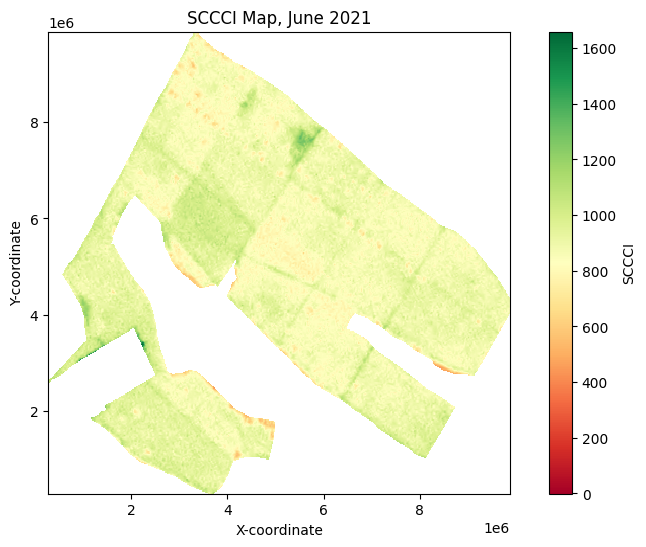

<IPython.core.display.Javascript object>

In [22]:
# Define the paths to your GeoTIFF image files
ndvi_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/ndvi_06_21.tif'


# Open the GeoTIFF files using rasterio
with rasterio.open(ndvi_output_path) as ndvi_src, rasterio.open(image_path) as red_edge_src:
    # Read the necessary bands for SCCCI calculation (NDVI and Red Edge)
    ndvi_band = ndvi_src.read(1).astype(float)  # Assuming NDVI is in the first band of ndvi_output_path
    red_edge_band = red_edge_src.read(7).astype(float)  # Assuming Red Edge is in the fifth band of red_edge_path

    # Ensure that the bands have the same shape
    assert ndvi_band.shape == red_edge_band.shape, "NDVI and Red Edge bands must have the same shape"

    # Handle NoData values (if any)
    ndvi_nodata = ndvi_src.meta['nodata']
    red_edge_nodata = red_edge_src.meta['nodata']

    ndvi_band[ndvi_band == ndvi_nodata] = np.nan
    red_edge_band[red_edge_band == red_edge_nodata] = np.nan

    # Calculate SCCCI
    sccci = (ndvi_band * red_edge_band) / ndvi_band

# Create a graph of SCCCI values
plt.figure(figsize=(10, 6))
plt.imshow(sccci, cmap='RdYlGn', vmin=-1, vmax=np.nanmax(sccci), extent=src.bounds, interpolation='none')
plt.colorbar(label='SCCCI')
plt.title('SCCCI Map, June 2021')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Save the graph as an image file
sccci_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/sccci_graph06_21.png'
plt.savefig(sccci_graph_path)
plt.show()

# Save the SCCCI values to a CSV file
df_sccci = pd.DataFrame(sccci, columns=[f'Column_{i}' for i in range(sccci.shape[1])])
df_sccci.to_csv('/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/sccci_values06_2021.csv', index=False)

In [23]:
# Update metadata for the new GeoTIFF with SCCCI values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the SCCCI GeoTIFF file
sccci_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/sccci_06_21.tif'

# Create a new GeoTIFF file and write SCCCI values
with rasterio.open(sccci_output_path, 'w', **meta) as dst:
    dst.write(sccci.astype(rasterio.float32), 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

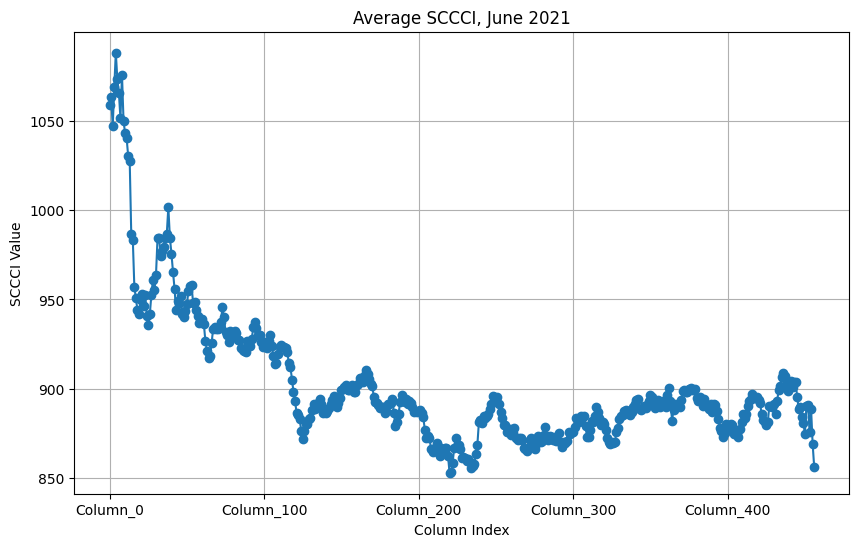

In [24]:
# Create a line chart of SCCCI values
df_sccci.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average SCCCI, June 2021')
plt.xlabel('Column Index')
plt.ylabel('SCCCI Value')
plt.grid(True)

Red Edge Chlorophyll Index
(CLRE)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

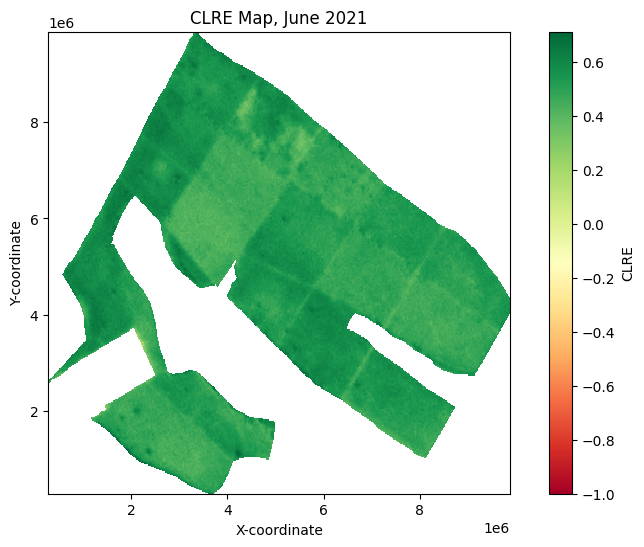

<IPython.core.display.Javascript object>

In [25]:
# Open the GeoTIFF image file using rasterio
with rasterio.open(image_path) as src:
    # Read the necessary bands for CLRE calculation (NIR and Red Edge)
    nir_band = src.read(8).astype(float)  # Convert to float
    red_edge_band = src.read(7).astype(float)  # Convert to float

    # Ensure that the bands have the same shape
    assert nir_band.shape == red_edge_band.shape, "NIR and Red Edge bands must have the same shape"

    # Handle NoData values (if any)
    nodata_value = src.meta['nodata']
    nir_band[nir_band == nodata_value] = np.nan
    red_edge_band[red_edge_band == nodata_value] = np.nan

    # Calculate CLRE
    clre_denominator = nir_band + red_edge_band
    clre_denominator[clre_denominator == 0] = np.nan  # Avoid division by zero
    clre = np.divide((nir_band - red_edge_band), clre_denominator, out=np.zeros_like(nir_band), where=clre_denominator != 0)

# Create a graph of CLRE values
plt.figure(figsize=(10, 6))
plt.imshow(clre, cmap='RdYlGn', vmin=-1, vmax=np.nanmax(clre), extent=src.bounds, interpolation='none')
plt.colorbar(label='CLRE')
plt.title('CLRE Map, June 2021')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Save the graph as an image file
clre_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/clre_graph06_21.png'
plt.savefig(clre_graph_path)
plt.show()

# Save the CLRE values to a CSV file
df_clre = pd.DataFrame(clre, columns=[f'Column_{i}' for i in range(clre.shape[1])])
df_clre.to_csv('/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/clre_values06_2021.csv', index=False)

In [26]:
# Update metadata for the new GeoTIFF with CLRE values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the CLRE GeoTIFF file
clre_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/clre_06_21.tif'

# Create a new GeoTIFF file and write CLRE values
with rasterio.open(clre_output_path, 'w', **meta) as dst:
    dst.write(clre.astype(rasterio.float32), 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

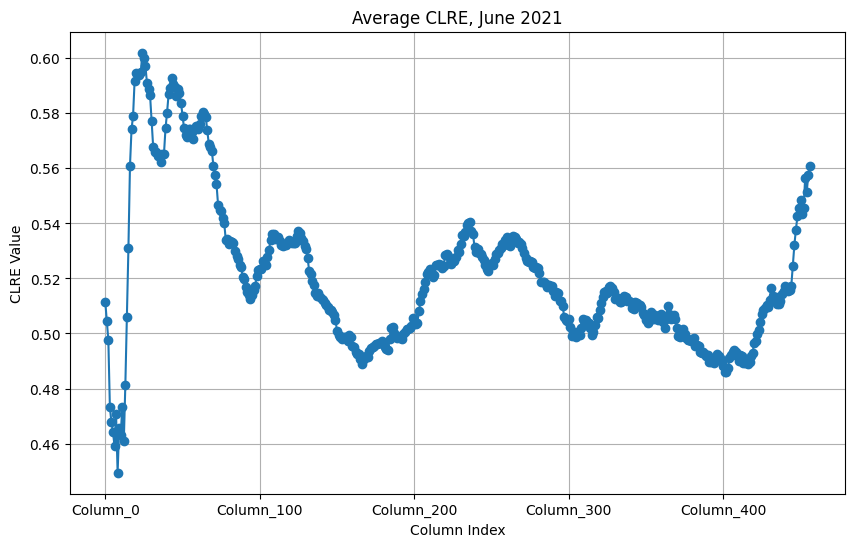

In [27]:
# Create a line chart of SCCCI values
df_clre.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average CLRE, June 2021')
plt.xlabel('Column Index')
plt.ylabel('CLRE Value')
plt.grid(True)

Simple ratio index (SRI)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

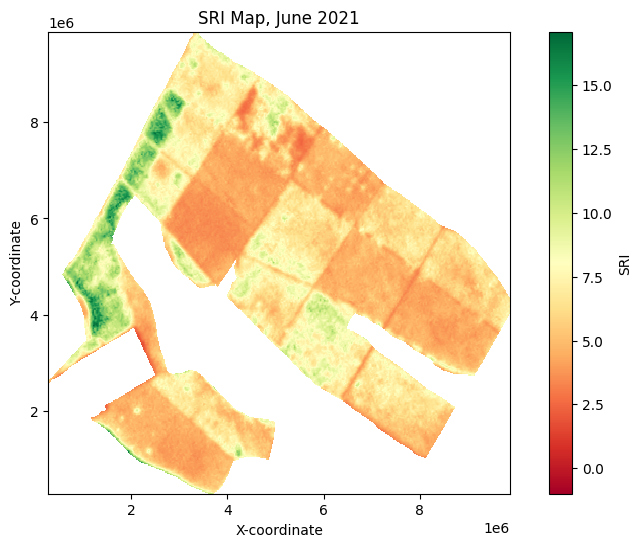

<IPython.core.display.Javascript object>

In [28]:
# Open the GeoTIFF image file using rasterio
with rasterio.open(image_path) as src:
    # Read the necessary bands for SRI calculation (NIR and Red)
    nir_band = src.read(8).astype(float)  # Convert to float
    red_band = src.read(6).astype(float)  # Convert to float

    # Ensure that the bands have the same shape
    assert nir_band.shape == red_band.shape, "NIR and Red bands must have the same shape"

    # Handle NoData values (if any)
    nodata_value = src.meta['nodata']
    nir_band[nir_band == nodata_value] = np.nan
    red_band[red_band == nodata_value] = np.nan

    # Calculate SRI
    sri = np.divide(nir_band, red_band, out=np.zeros_like(nir_band), where=red_band != 0)

# Create a graph of SRI values
plt.figure(figsize=(10, 6))
plt.imshow(sri, cmap='RdYlGn', vmin=-1, vmax=np.nanmax(sri), extent=src.bounds, interpolation='none')
plt.colorbar(label='SRI')
plt.title('SRI Map, June 2021')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Save the graph as an image file
sri_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/sri_graph06_21.png'
plt.savefig(sri_graph_path)
plt.show()

# Save the SRI values to a CSV file
df_sri = pd.DataFrame(sri, columns=[f'Column_{i}' for i in range(sri.shape[1])])
df_sri.to_csv('/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/sri_values06_2021.csv', index=False)

In [29]:
# Update metadata for the new GeoTIFF with SRI values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the SRI GeoTIFF file
sri_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/sri_06_21.tif'

# Create a new GeoTIFF file and write SRI values
with rasterio.open(sri_output_path, 'w', **meta) as dst:
    dst.write(sri.astype(rasterio.float32), 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

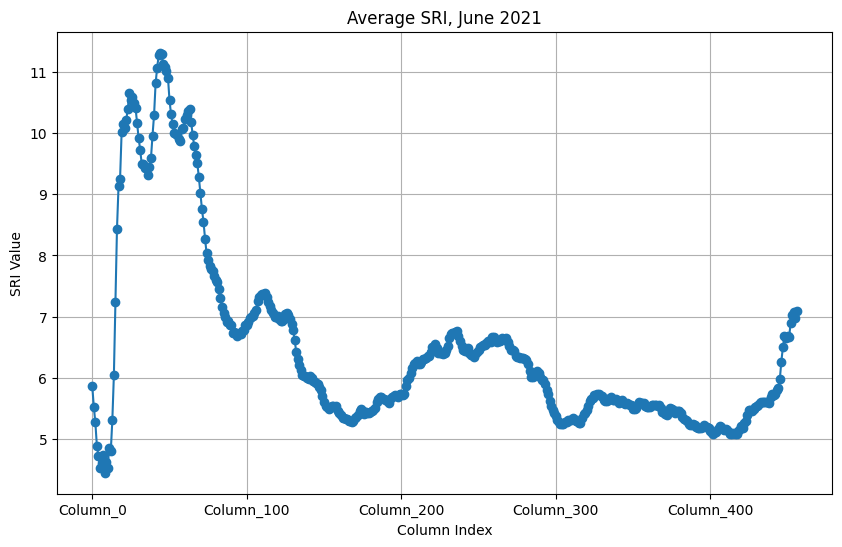

In [30]:
# Create a line chart of SRI values
df_sri.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average SRI, June 2021')
plt.xlabel('Column Index')
plt.ylabel('SRI Value')
plt.grid(True)

Soil	adjusted	vegtation
index (SAVI)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

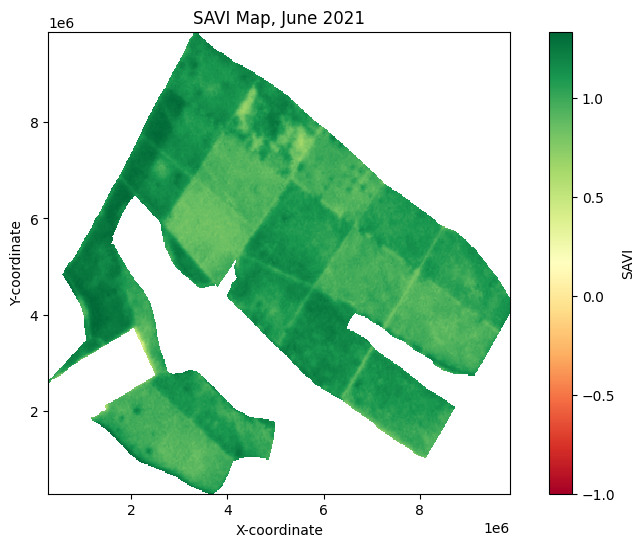

<IPython.core.display.Javascript object>

In [31]:
# Soil adjustment factor (L)
L = 0.5

# Open the GeoTIFF image file using rasterio
with rasterio.open(image_path) as src:
    # Read the necessary bands for SAVI calculation (NIR and Red)
    nir_band = src.read(8).astype(float)  # Convert to float
    red_band = src.read(6).astype(float)  # Convert to float

    # Ensure that the bands have the same shape
    assert nir_band.shape == red_band.shape, "NIR and Red bands must have the same shape"

    # Handle NoData values (if any)
    nodata_value = src.meta['nodata']
    nir_band[nir_band == nodata_value] = np.nan
    red_band[red_band == nodata_value] = np.nan

    # Calculate SAVI
    savi_numerator = (1 + L) * (nir_band - red_band)
    savi_denominator = nir_band + red_band + L
    savi = np.divide(savi_numerator, savi_denominator, out=np.zeros_like(nir_band), where=savi_denominator != 0)

# Create a graph of SAVI values
plt.figure(figsize=(10, 6))
plt.imshow(savi, cmap='RdYlGn', vmin=-1, vmax=np.nanmax(savi), extent=src.bounds, interpolation='none')
plt.colorbar(label='SAVI')
plt.title('SAVI Map, June 2021')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Save the graph as an image file
savi_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/savi_graph06_21.png'
plt.savefig(savi_graph_path)
plt.show()

# Save the SAVI values to a CSV file
df_savi = pd.DataFrame(savi, columns=[f'Column_{i}' for i in range(savi.shape[1])])
df_savi.to_csv('/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/savi_values06_2021.csv', index=False)

In [32]:
# Update metadata for the new GeoTIFF with SAVI values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the SAVI GeoTIFF file
savi_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/savi_06_21.tif'

# Create a new GeoTIFF file and write SAVI values
with rasterio.open(savi_output_path, 'w', **meta) as dst:
    dst.write(savi.astype(rasterio.float32), 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

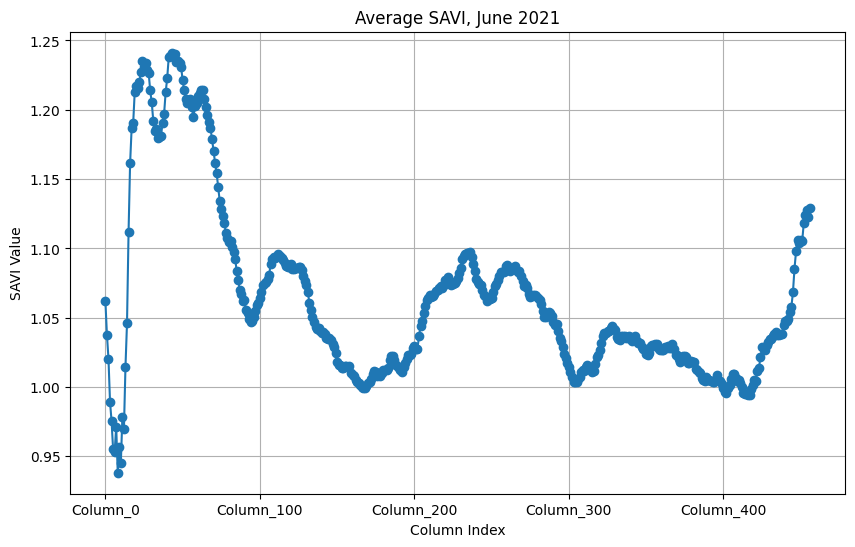

In [33]:
# Create a line chart of SAVI values
df_savi.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average SAVI, June 2021')
plt.xlabel('Column Index')
plt.ylabel('SAVI Value')
plt.grid(True)

Visible	atmospherically
resistant index (VARIgreen)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

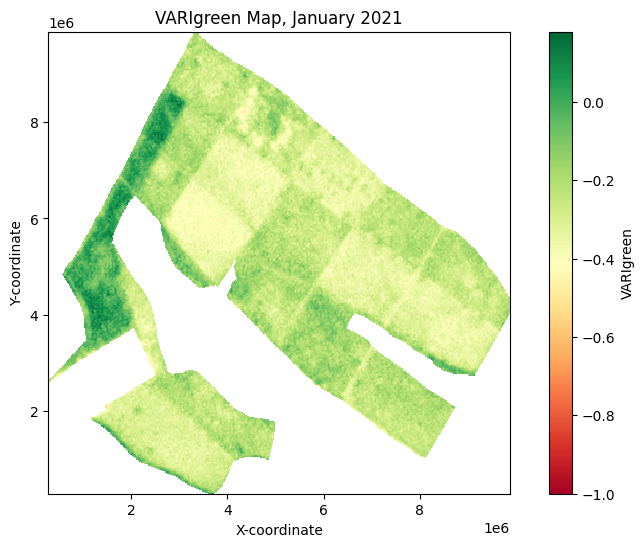

<IPython.core.display.Javascript object>

In [34]:
# Open the GeoTIFF image file using rasterio
with rasterio.open(image_path) as src:
    # Read the necessary bands for VARIgreen calculation (Green and Red)
    green_band = src.read(3).astype(float)  # Convert to float
    red_band = src.read(6).astype(float)  # Convert to float

    # Ensure that the bands have the same shape
    assert green_band.shape == red_band.shape, "Green and Red bands must have the same shape"

    # Handle NoData values (if any)
    nodata_value = src.meta['nodata']
    green_band[green_band == nodata_value] = np.nan
    red_band[red_band == nodata_value] = np.nan

    # Calculate VARIgreen
    varigreen = np.divide((green_band - red_band), (green_band + red_band + 0.1), out=np.zeros_like(green_band), where=(green_band + red_band + 0.1) != 0)

# Create a graph of VARIgreen values
plt.figure(figsize=(10, 6))
plt.imshow(varigreen, cmap='RdYlGn', vmin=-1, vmax=np.nanmax(varigreen), extent=src.bounds, interpolation='none')
plt.colorbar(label='VARIgreen')
plt.title('VARIgreen Map, January 2021')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Save the graph as an image file
varigreen_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/varigreen_graph01_21.png'
plt.savefig(varigreen_graph_path)
plt.show()

# Save the VARIgreen values to a CSV file
df_varigreen = pd.DataFrame(varigreen, columns=[f'Column_{i}' for i in range(varigreen.shape[1])])
df_varigreen.to_csv('/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/varigreen_values01_2021.csv', index=False)


In [35]:
# Update metadata for the new GeoTIFF with VARIGREEN values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the VARIGREEN GeoTIFF file
varigreen_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/varigreen_06_21.tif'

# Create a new GeoTIFF file and write VARIGREEN values
with rasterio.open(varigreen_output_path, 'w', **meta) as dst:
    dst.write(varigreen.astype(rasterio.float32), 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

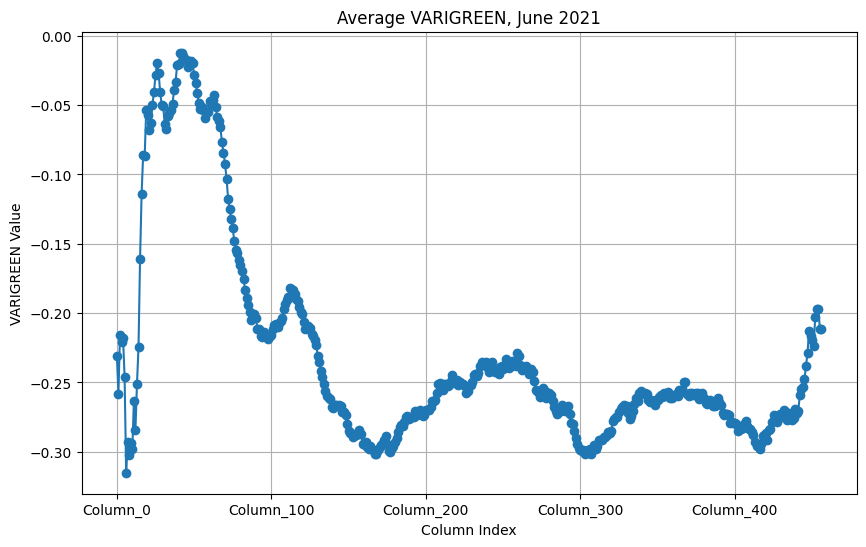

In [36]:
# Create a line chart of VARIGREEN values
df_varigreen.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average VARIGREEN, June 2021')
plt.xlabel('Column Index')
plt.ylabel('VARIGREEN Value')
plt.grid(True)

Plant senescence reflectance
index (PSRI)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

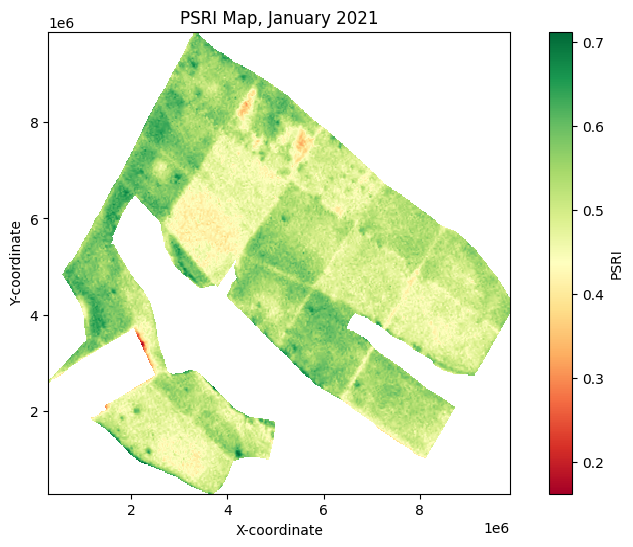

<IPython.core.display.Javascript object>

In [37]:
# Open the GeoTIFF image file using rasterio
with rasterio.open(image_path) as src:
    # Read the necessary bands for PSRI calculation (RedEdge and NIR)
    red_edge_band = src.read(7).astype(float)  # Convert to float
    nir_band = src.read(8).astype(float)  # Convert to float

    # Ensure that the bands have the same shape
    assert red_edge_band.shape == nir_band.shape, "RedEdge and NIR bands must have the same shape"

    # Handle NoData values (if any)
    nodata_value = src.meta['nodata']
    red_edge_band[red_edge_band == nodata_value] = np.nan
    nir_band[nir_band == nodata_value] = np.nan

    # Calculate PSRI
    psri_numerator = nir_band - red_edge_band
    psri_denominator = nir_band + red_edge_band
    psri = np.divide(psri_numerator, psri_denominator, out=np.zeros_like(red_edge_band), where=psri_denominator != 0)

# Create a graph of PSRI values
plt.figure(figsize=(10, 6))
plt.imshow(psri, cmap='RdYlGn', vmin=np.nanmin(psri), vmax=np.nanmax(psri), extent=src.bounds, interpolation='none')
plt.colorbar(label='PSRI')
plt.title('PSRI Map, January 2021')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Save the graph as an image file
psri_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/psri_graph01_21.png'
plt.savefig(psri_graph_path)
plt.show()

# Save the PSRI values to a CSV file
df_psri = pd.DataFrame(psri, columns=[f'Column_{i}' for i in range(psri.shape[1])])
df_psri.to_csv('/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/psri_values01_2021.csv', index=False)


In [38]:
# Update metadata for the new GeoTIFF with PSRI values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the PSRI GeoTIFF file
psri_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/psri_06_21.tif'

# Create a new GeoTIFF file and write PSRI values
with rasterio.open(psri_output_path, 'w', **meta) as dst:
    dst.write(psri.astype(rasterio.float32), 1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

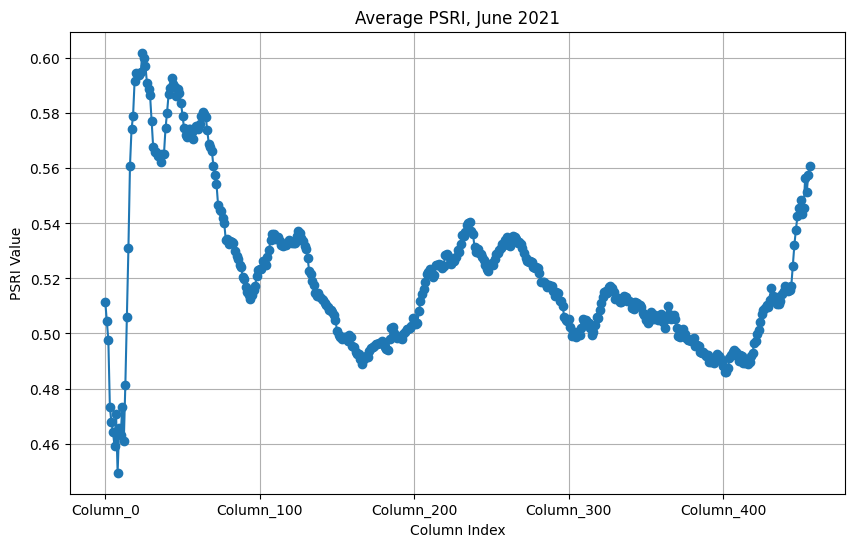

In [39]:
# Create a line chart of PSRI values
df_psri.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average PSRI, June 2021')
plt.xlabel('Column Index')
plt.ylabel('PSRI Value')
plt.grid(True)


Structural	independent
pigment index (SIPI)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

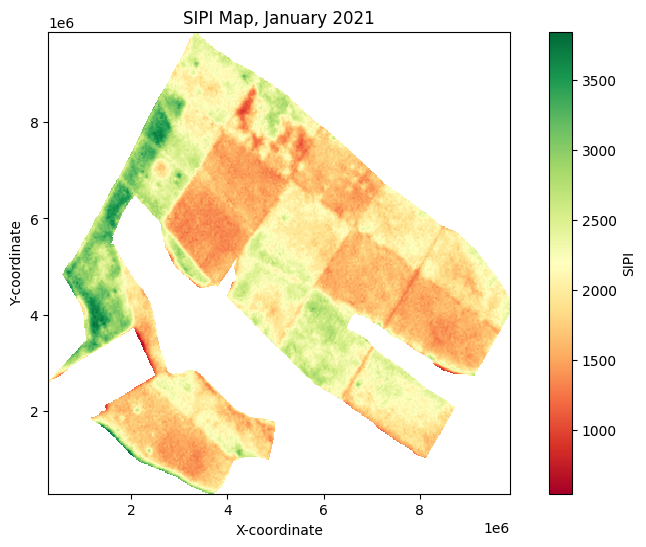

<IPython.core.display.Javascript object>

In [40]:
# Open the GeoTIFF image file using rasterio
with rasterio.open(image_path) as src:
    # Read the necessary bands for SIPI calculation (Red and NIR)
    red_band = src.read(6).astype(float)  # Convert to float
    nir_band = src.read(8).astype(float)  # Convert to float

    # Ensure that the bands have the same shape
    assert red_band.shape == nir_band.shape, "Red and NIR bands must have the same shape"

    # Handle NoData values (if any)
    nodata_value = src.meta['nodata']
    red_band[red_band == nodata_value] = np.nan
    nir_band[nir_band == nodata_value] = np.nan

    # Calculate SIPI
    sipi_numerator = (nir_band - red_band) / (nir_band + red_band)
    sipi = sipi_numerator * (nir_band - 1)

# Create a graph of SIPI values
plt.figure(figsize=(10, 6))
plt.imshow(sipi, cmap='RdYlGn', vmin=np.nanmin(sipi), vmax=np.nanmax(sipi), extent=src.bounds, interpolation='none')
plt.colorbar(label='SIPI')
plt.title('SIPI Map, January 2021')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Save the graph as an image file
sipi_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/sipi_graph01_21.png'
plt.savefig(sipi_graph_path)
plt.show()

# Save the SIPI values to a CSV file
df_sipi = pd.DataFrame(sipi, columns=[f'Column_{i}' for i in range(sipi.shape[1])])
df_sipi.to_csv('/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/sipi_values01_2021.csv', index=False)


In [41]:
# Update metadata for the new GeoTIFF with SIPI values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the SIPI GeoTIFF file
sipi_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/sipi_06_21.tif'

# Create a new GeoTIFF file and write SIPI values
with rasterio.open(sipi_output_path, 'w', **meta) as dst:
    dst.write(sipi.astype(rasterio.float32), 1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

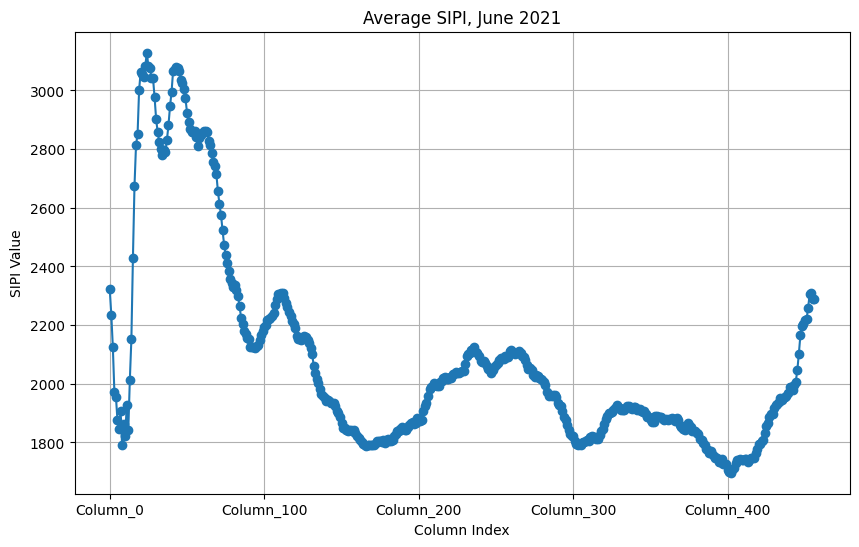

In [42]:
# Create a line chart of SIPI values
df_sipi.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average SIPI, June 2021')
plt.xlabel('Column Index')
plt.ylabel('SIPI Value')
plt.grid(True)

Normalized Difference Red
Edge Index (NDRE)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

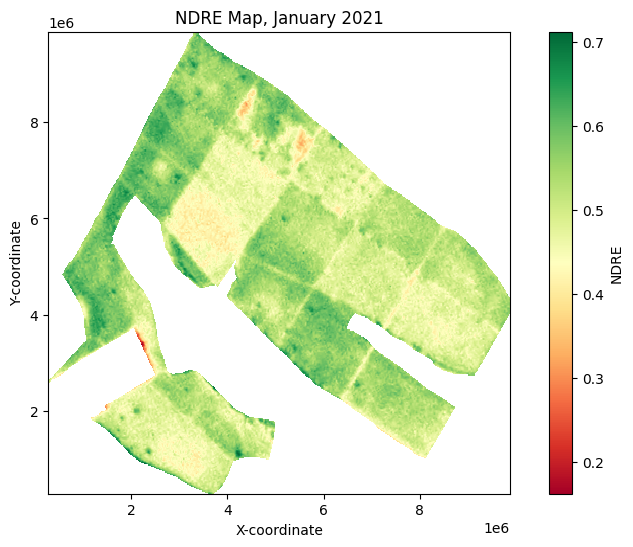

<IPython.core.display.Javascript object>

In [43]:
# Open the GeoTIFF image file using rasterio
with rasterio.open(image_path) as src:
    # Read the necessary bands for NDRE calculation (Red Edge and NIR)
    re_band = src.read(7).astype(float)  # Convert to float
    nir_band = src.read(8).astype(float)  # Convert to float

    # Ensure that the bands have the same shape
    assert re_band.shape == nir_band.shape, "Red Edge and NIR bands must have the same shape"

    # Handle NoData values (if any)
    nodata_value = src.meta['nodata']
    re_band[re_band == nodata_value] = np.nan
    nir_band[nir_band == nodata_value] = np.nan

    # Calculate NDRE
    ndre_numerator = nir_band - re_band
    ndre_denominator = nir_band + re_band
    ndre = np.divide(ndre_numerator, ndre_denominator, out=np.zeros_like(re_band), where=ndre_denominator != 0)

# Create a graph of NDRE values
plt.figure(figsize=(10, 6))
plt.imshow(ndre, cmap='RdYlGn', vmin=np.nanmin(ndre), vmax=np.nanmax(ndre), extent=src.bounds, interpolation='none')
plt.colorbar(label='NDRE')
plt.title('NDRE Map, January 2021')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Save the graph as an image file
ndre_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/ndre_graph01_21.png'
plt.savefig(ndre_graph_path)
plt.show()

# Save the NDRE values to a CSV file
df_ndre = pd.DataFrame(ndre, columns=[f'Column_{i}' for i in range(ndre.shape[1])])
df_ndre.to_csv('/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/ndre_values01_2021.csv', index=False)


In [44]:
# Update metadata for the new GeoTIFF with NDRE values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the NDRE GeoTIFF file
ndre_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/ndre_06_21.tif'

# Create a new GeoTIFF file and write NDRE values
with rasterio.open(ndre_output_path, 'w', **meta) as dst:
    dst.write(ndre.astype(rasterio.float32), 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

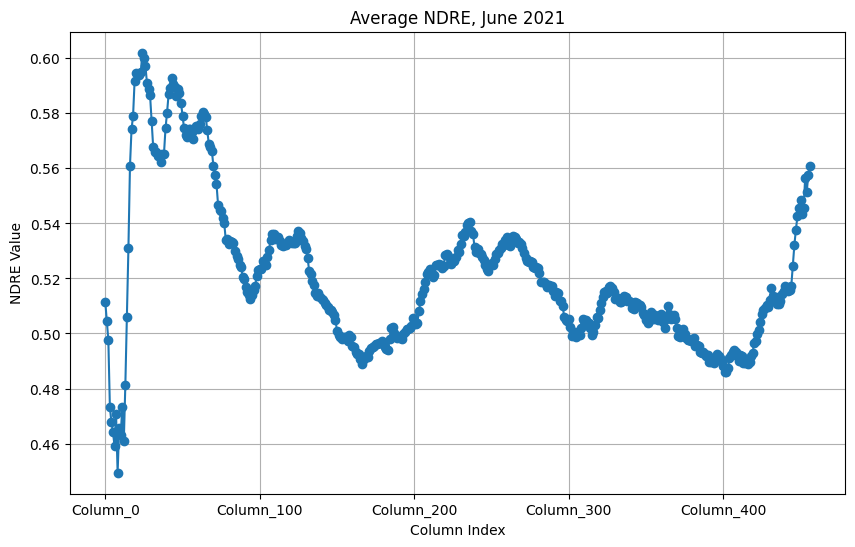

In [45]:
# Create a line chart of NDRE values
df_ndre.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average NDRE, June 2021')
plt.xlabel('Column Index')
plt.ylabel('NDRE Value')
plt.grid(True)

Green	Chlorophyll	Index
(GCI)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

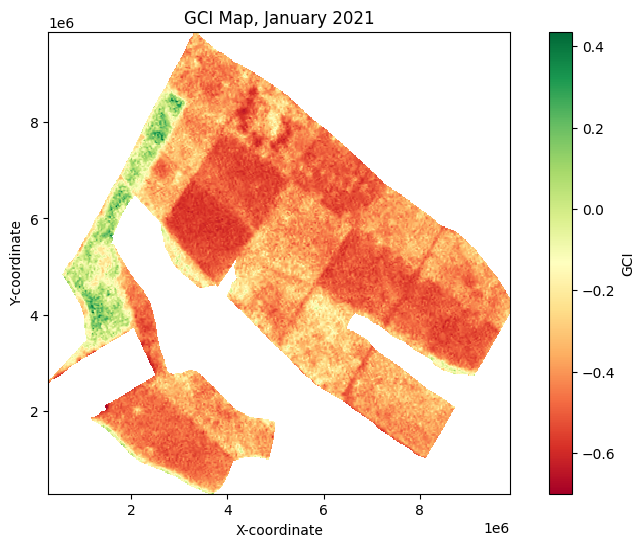

<IPython.core.display.Javascript object>

In [46]:
# Open the GeoTIFF image file using rasterio
with rasterio.open(image_path) as src:
    # Read the necessary bands for GCI calculation (Green and Red)
    green_band = src.read(3).astype(float)  # Convert to float
    red_band = src.read(6).astype(float)    # Convert to float

    # Ensure that the bands have the same shape
    assert green_band.shape == red_band.shape, "Green and Red bands must have the same shape"

    # Handle NoData values (if any)
    nodata_value = src.meta['nodata']
    green_band[green_band == nodata_value] = np.nan
    red_band[red_band == nodata_value] = np.nan

    # Calculate GCI
    gci = np.divide(green_band, red_band, out=np.zeros_like(green_band), where=red_band != 0) - 1

# Create a graph of GCI values
plt.figure(figsize=(10, 6))
plt.imshow(gci, cmap='RdYlGn', vmin=np.nanmin(gci), vmax=np.nanmax(gci), extent=src.bounds, interpolation='none')
plt.colorbar(label='GCI')
plt.title('GCI Map, January 2021')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Save the graph as an image file
gci_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/gci_graph01_21.png'
plt.savefig(gci_graph_path)
plt.show()

# Save the GCI values to a CSV file
df_gci = pd.DataFrame(gci, columns=[f'Column_{i}' for i in range(gci.shape[1])])
df_gci.to_csv('/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/gci_values01_2021.csv', index=False)


In [47]:
# Update metadata for the new GeoTIFF with GCI values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the GCI GeoTIFF file
gci_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/gci_06_21.tif'

# Create a new GeoTIFF file and write GCI values
with rasterio.open(gci_output_path, 'w', **meta) as dst:
    dst.write(gci.astype(rasterio.float32), 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

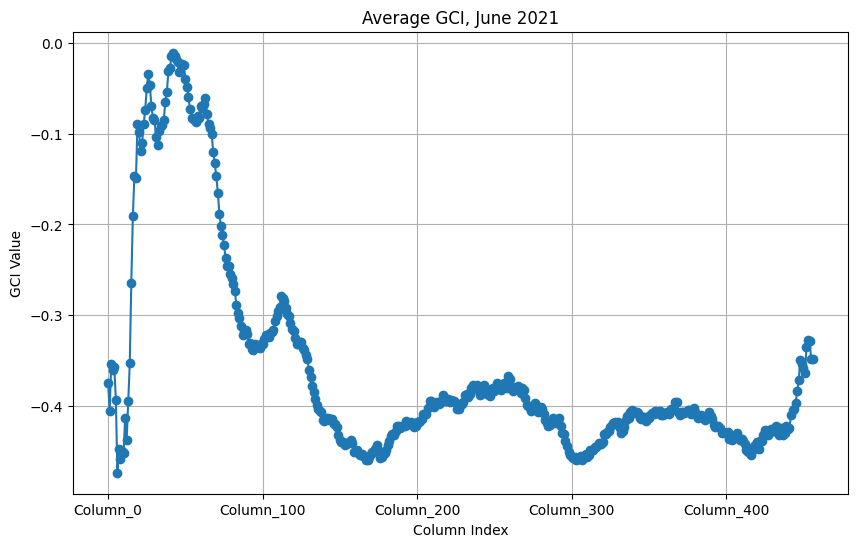

In [48]:
# Create a line chart of GCI values
df_gci.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average GCI, June 2021')
plt.xlabel('Column Index')
plt.ylabel('GCI Value')
plt.grid(True)

Excess Green (ExG)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

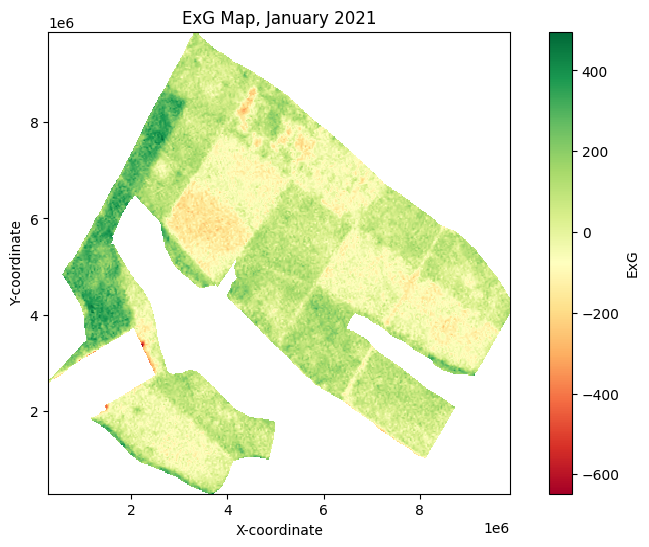

<IPython.core.display.Javascript object>

In [49]:
# Open the GeoTIFF image file using rasterio
with rasterio.open(image_path) as src:
    # Read the necessary bands for ExG calculation (Green, Red, and Blue)
    green_band = src.read(3).astype(float)  # Convert to float
    red_band = src.read(6).astype(float)    # Convert to float
    blue_band = src.read(2).astype(float)   # Convert to float

    # Ensure that the bands have the same shape
    assert green_band.shape == red_band.shape == blue_band.shape, "Green, Red, and Blue bands must have the same shape"

    # Handle NoData values (if any)
    nodata_value = src.meta['nodata']
    green_band[green_band == nodata_value] = np.nan
    red_band[red_band == nodata_value] = np.nan
    blue_band[blue_band == nodata_value] = np.nan

    # Calculate ExG
    exg = 2 * green_band - red_band - blue_band

# Create a graph of ExG values
plt.figure(figsize=(10, 6))
plt.imshow(exg, cmap='RdYlGn', vmin=np.nanmin(exg), vmax=np.nanmax(exg), extent=src.bounds, interpolation='none')
plt.colorbar(label='ExG')
plt.title('ExG Map, January 2021')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Save the graph as an image file
exg_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/exg_graph01_21.png'
plt.savefig(exg_graph_path)
plt.show()

# Save the ExG values to a CSV file
df_exg = pd.DataFrame(exg, columns=[f'Column_{i}' for i in range(exg.shape[1])])
df_exg.to_csv('/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/exg_values01_2021.csv', index=False)


In [50]:
# Update metadata for the new GeoTIFF with EXG values
meta.update(dtype=rasterio.float32, count=1)

# Define the path to save the EXG GeoTIFF file
exg_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/exg_06_21.tif'

# Create a new GeoTIFF file and write EXG values
with rasterio.open(exg_output_path, 'w', **meta) as dst:
    dst.write(exg.astype(rasterio.float32), 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

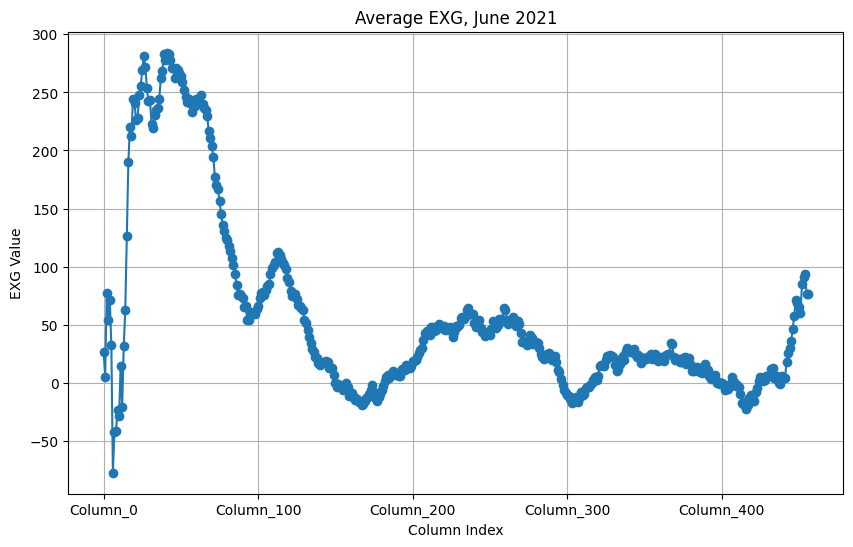

In [51]:
# Create a line chart of EXG values
df_exg.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average EXG, June 2021')
plt.xlabel('Column Index')
plt.ylabel('EXG Value')
plt.grid(True)

Transformed	Vegetation Index (TVI)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

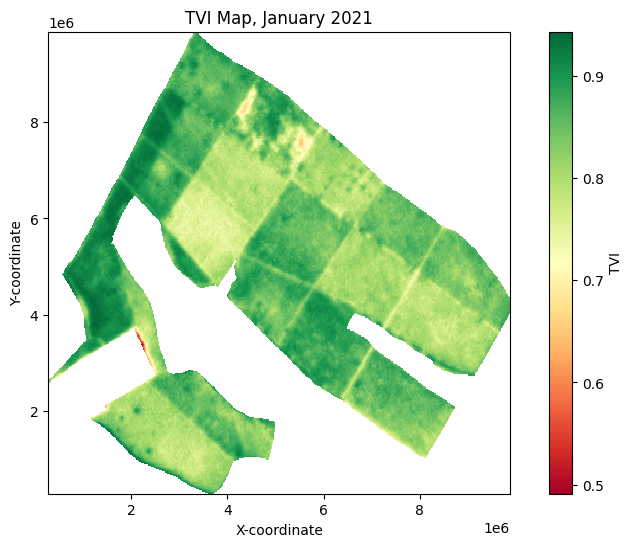

<IPython.core.display.Javascript object>

In [57]:
# Open the GeoTIFF image file using rasterio
with rasterio.open(image_path) as src:
    # Read the necessary bands for TVI calculation (Red and NIR)
    red_band = src.read(6).astype(float)  # Convert to float
    nir_band = src.read(8).astype(float)  # Convert to float

    # Ensure that the bands have the same shape
    assert red_band.shape == nir_band.shape, "Red and NIR bands must have the same shape"

    # Handle NoData values (if any)
    nodata_value = src.meta['nodata']
    red_band[red_band == nodata_value] = np.nan
    nir_band[nir_band == nodata_value] = np.nan

    # Calculate TVI
    tvi_numerator = np.sqrt(np.abs((nir_band - red_band) / (nir_band + red_band + 0.5)))

# Create a graph of TVI values
plt.figure(figsize=(10, 6))
plt.imshow(tvi_numerator, cmap='RdYlGn', vmin=np.nanmin(tvi_numerator), vmax=np.nanmax(tvi_numerator), extent=src.bounds, interpolation='none')
plt.colorbar(label='TVI')
plt.title('TVI Map, January 2021')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# Save the graph as an image file
tvi_graph_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/tvi_graph01_21.png'
plt.savefig(tvi_graph_path)
plt.show()

# Save the TVI values to a CSV file
df_tvi = pd.DataFrame(tvi_numerator, columns=[f'Column_{i}' for i in range(tvi_numerator.shape[1])])
tvi_csv_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/graphs_charts/tvi_values01_2021.csv'
df_tvi.to_csv(tvi_csv_path, index=False)


In [59]:
# Update metadata for the new GeoTIFF with TVI values
meta.update(dtype=rasterio.float32, count=1)

tvi_numerator_output_path = '/content/drive/My Drive/FINAL_PROJECT/IMAGES/Output/tvi_06_21.tif'

# Create a new GeoTIFF file and write TVI values
with rasterio.open(tvi_output_path, 'w', **meta) as dst:
    dst.write(tvi_numerator.astype(rasterio.float32), 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

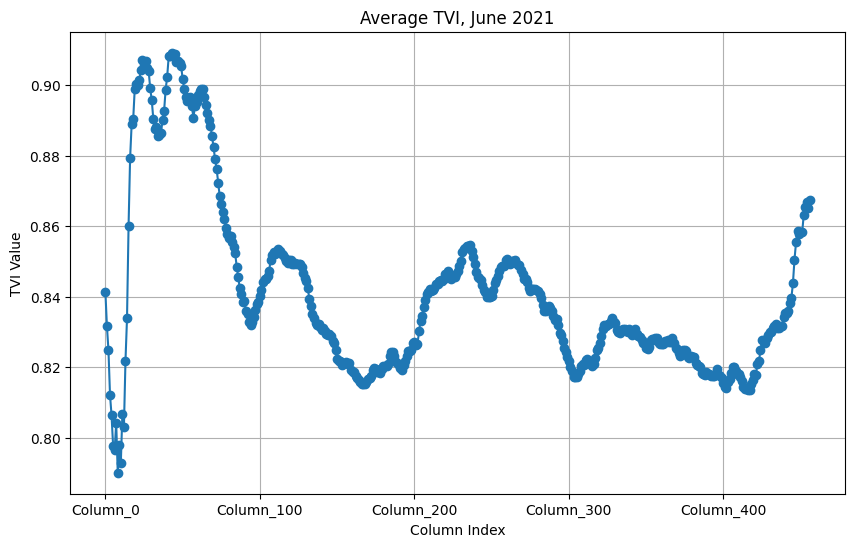

In [56]:
# Create a line chart of TVI values
df_tvi.mean().plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average TVI, June 2021')
plt.xlabel('Column Index')
plt.ylabel('TVI Value')
plt.grid(True)